In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
aggregated = pd.read_csv("src/main/resources/aggregated_results.csv")
statistics = pd.read_csv("src/main/resources/statistics.csv")
model = pd.read_csv("src/main/resources/model_results.csv")

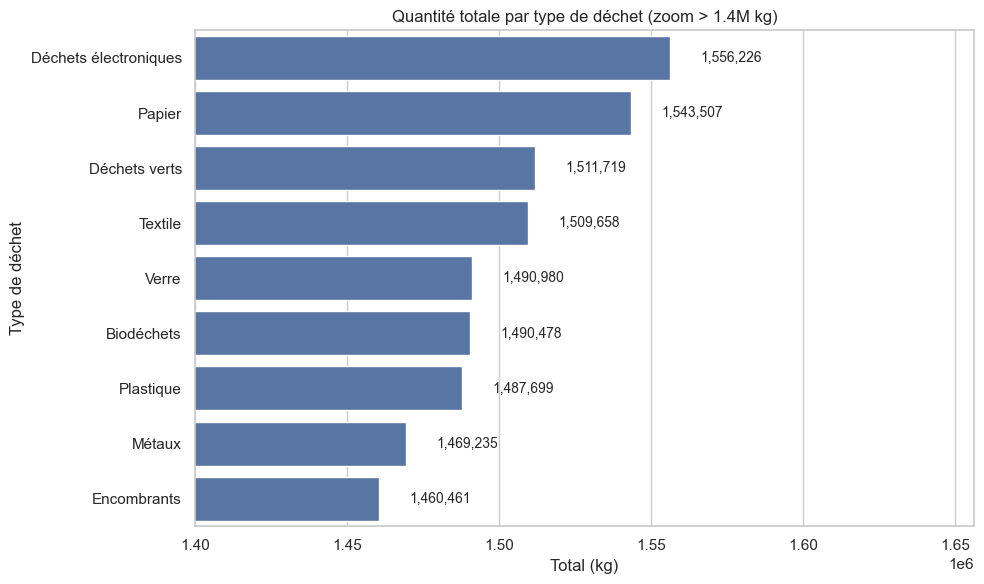

In [58]:
dechet_grouped = aggregated.groupby("type_dechet")["total_kg_par_type"].sum().sort_values(ascending=False)

plt.figure()
ax = sns.barplot(
    x=dechet_grouped.values.flatten(), 
    y=dechet_grouped.index, 
)
plt.xlabel("Total (kg)")
plt.ylabel("Type de déchet")
plt.title("Quantité totale par type de déchet (zoom > 1.4M kg)")

plt.xlim(1.4e6, dechet_grouped.values.max() + 1e5)

for i, v in enumerate(dechet_grouped.values.flatten()):
    if v > 1.4e6:
        ax.text(v + 1e4, i, f"{v:,.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

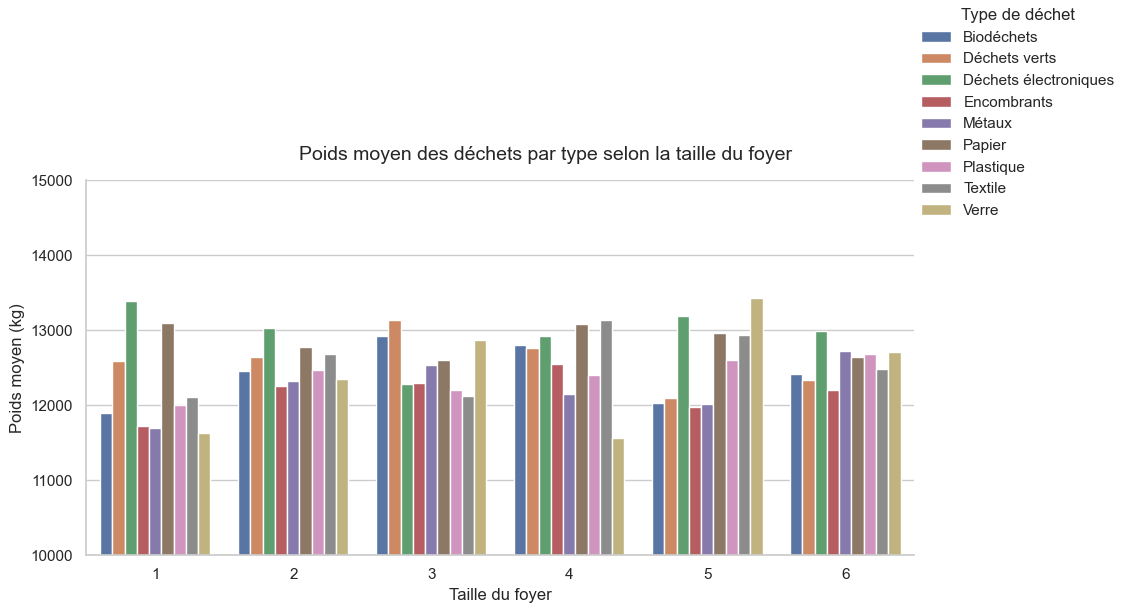

In [59]:
avg_by_household = (
    aggregated
    .groupby(["nombre_personnes_foyer", "type_dechet"])["total_kg_par_type"]
    .mean()
    .reset_index()
)

g = sns.catplot(
    data=avg_by_household,
    kind="bar",
    x="nombre_personnes_foyer",
    y="total_kg_par_type",
    hue="type_dechet",
    height=5,
    aspect=1.8
)

g.set(ylim=(10000, 15000))
g.set_axis_labels("Taille du foyer", "Poids moyen (kg)")
g.set_xticklabels(rotation=0)
g.fig.suptitle("Poids moyen des déchets par type selon la taille du foyer", fontsize=14, y=0.95)

plt.tight_layout(rect=[0, 0, 0.85, 1])

if g._legend:
    g._legend.set_bbox_to_anchor((1.02, 1))
    g._legend.set_frame_on(False)
    g._legend.set_title("Type de déchet")
else:
    plt.legend(title="Type de déchet", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

plt.show()

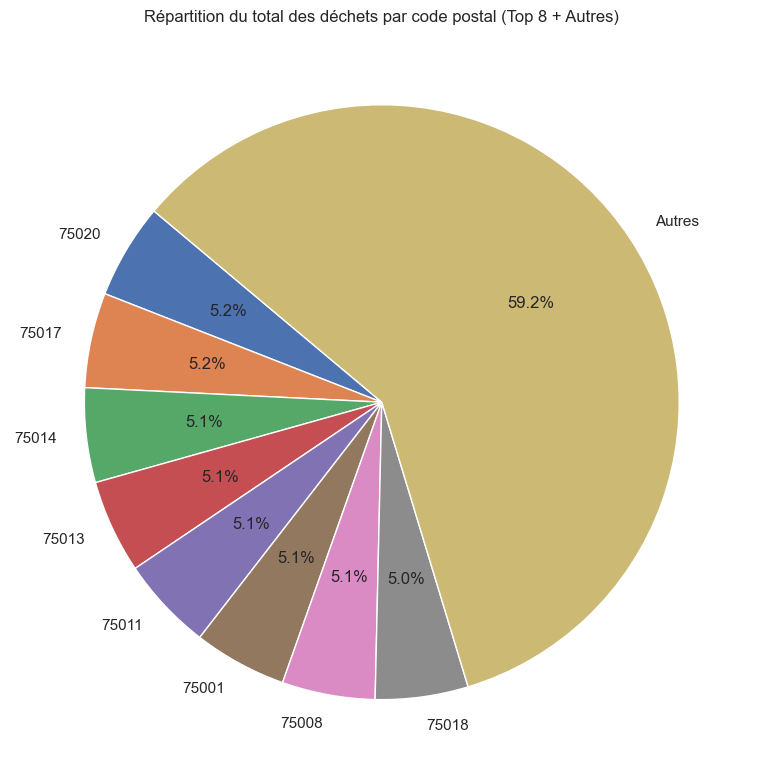

In [60]:
postal_totals = aggregated.groupby("code_postal")["total_kg_par_type"].sum()

top_n = 8
top_postals = postal_totals.sort_values(ascending=False)[:top_n]
other_sum = postal_totals.sort_values(ascending=False)[top_n:].sum()

postal_pie = top_postals.copy()
postal_pie["Autres"] = other_sum

plt.figure(figsize=(8, 8))
plt.pie(
    postal_pie,
    labels=postal_pie.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Répartition du total des déchets par code postal (Top 8 + Autres)")
plt.tight_layout()
plt.show()

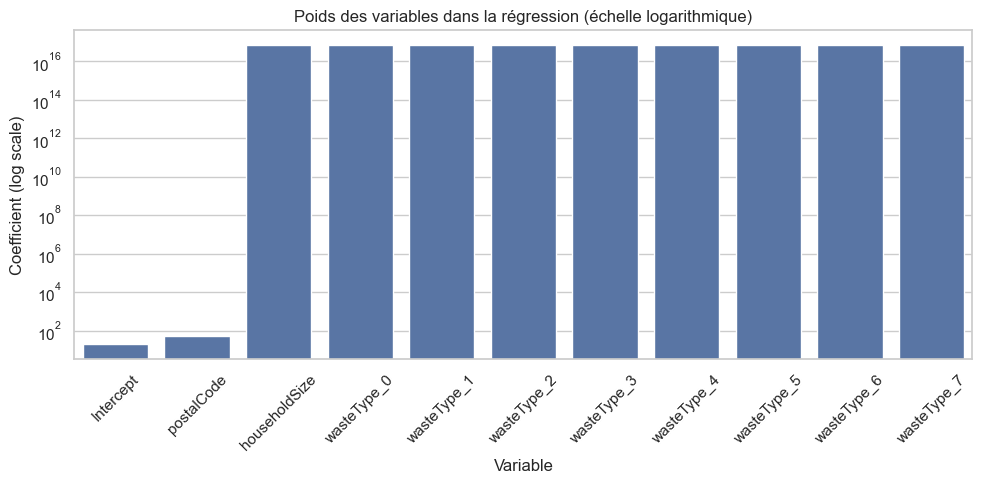

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=coef_df_all, x="metric", y="value")
plt.yscale("log")
plt.title("Poids des variables dans la régression (échelle logarithmique)")
plt.xlabel("Variable")
plt.ylabel("Coefficient (log scale)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="font-size:20px; color:red;">⚠️</span> <span style="font-size:16px;"> Remarque : Les données utilisées ici sont simulées et ne reflètent pas un comportement réel. Par conséquent, les résultats du modèle de régression sont peu significatifs, comme l'indiquent les coefficients très élevés et le faible R². Ce graphique est présenté à titre illustratif.
</span>